# 사용하지 말것

In [20]:
# import tweepy

# api_key = "KSThVt5eztFjt0dPwIzS90TLM"
# api_secret = "OScxzoFbkQV3zgnswPAvVxrEs50poU3bqnRaEyLzJgom0CzfzZ"
# access_token = "1337334626101022722-2SNC8JqbH33h46RInwMtfHDJPRwOh0"
# access_token_secret = "LOxtEm7Jvi7hXxc4sP2O0Jd0vTQmrOtuTQxpIR5eJa4BP"

# auth = tweepy.OAuthHandler(api_key, api_secret)
# auth.set_access_token(access_token, access_token_secret)

# # twitter API를 사용하기 위한 준비입니다.
# api = tweepy.API(auth)

In [ ]:
# keyword = '분리수거'
# result = []

# for i in range(1,100):
#     print("Get data", str(i/500*100), "% complete..")
#     tweets = api.search(keyword)
#     for tweet in tweets:
#         info_list = [tweet.created_at, tweet.text]
#         result.append(info_list)

In [ ]:
# import pandas as pd 
# twitter_df = pd.DataFrame(result, columns = ["날짜", "내용"])
# twitter_df.to_csv("twitter_bottle.csv", index = False)

# 여기서부터 사용

In [1]:
import base64

# 트위터 API 개발자 키를 아래에 입력
client_key = 'KSThVt5eztFjt0dPwIzS90TLM'
client_secret = 'OScxzoFbkQV3zgnswPAvVxrEs50poU3bqnRaEyLzJgom0CzfzZ'

# b64 encoded 형태로 만드는 과정 
key_secret = '{}:{}'.format(client_key, client_secret).encode('ascii')
b64_encoded_key = base64.b64encode(key_secret)
b64_encoded_key = b64_encoded_key.decode('ascii')

In [2]:
import requests

# request에 필요한 url 만들기
base_url = 'https://api.twitter.com/'
auth_url = '{}oauth2/token'.format(base_url)

# HEADER 구성하기
auth_headers = {
    'Authorization': 'Basic {}'.format(b64_encoded_key),
    'Content-Type': 'application/x-www-form-urlencoded;charset=UTF-8'
}

# Authentication Data section 만들기
auth_data = {
    'grant_type': 'client_credentials'
}

# POST request를 보내서 status 확인!
auth_resp = requests.post(auth_url, headers=auth_headers, data=auth_data)
print(auth_resp.status_code)


200


# 30~60분 단위로 돌려주자.

In [24]:
# Bearer token 정의하기
access_token = auth_resp.json()['access_token']

# Search HEADER 구성하기
search_headers = {
    'Authorization': 'Bearer {}'.format(access_token)
}

# SEARCH TWEET
# Maximum number of tweets returned from a single token is 18,000 

search_params = {
    'q':'재활용 OR 분리수거',
    'result_type': 'recent', # 'mixed' or 'popular' 로도 지정 가능
    'count':100, # 디폴트 값은 15이며, 최대 100까지 지정 가능
    'retryonratelimit':True, # rate limit에 도달했을 때 자동으로 다시 trial
}

search_url = '{}1.1/search/tweets.json'.format(base_url)
search_resp = requests.get(
    search_url, headers=search_headers, 
    params=search_params
)

In [25]:
import json
import pandas as pd
Data = json.loads(search_resp.content)

# Dict -> Dataframe
df = pd.DataFrame(Data['statuses'])
df[["id",'created_at','text','retweet_count']] # 몇 개의 칼럼만 확인해보기

,id,created_at,text,retweet_count
0,1339794190322962433,Fri Dec 18 04:46:41 +0000 2020,RT @mycharmingboys: 조슈아 조은 점 만사천오십팔번째 ..\n도겸이 ...,142
1,1339793986513354752,Fri Dec 18 04:45:53 +0000 2020,RT @mycharmingboys: 조슈아 조은 점 만사천오십팔번째 ..\n도겸이 ...,142
2,1339793872554057728,Fri Dec 18 04:45:26 +0000 2020,RT @mycharmingboys: 조슈아 조은 점 만사천오십팔번째 ..\n도겸이 ...,142
3,1339793000361127937,Fri Dec 18 04:41:58 +0000 2020,RT @mycharmingboys: 조슈아 조은 점 만사천오십팔번째 ..\n도겸이 ...,142
4,1339792946078437378,Fri Dec 18 04:41:45 +0000 2020,오늘이 분리수거날인가요 ? https://t.co/nYv29lAsYj,0
...,...,...,...,...
95,1339770721887604736,Fri Dec 18 03:13:26 +0000 2020,RT @mycharmingboys: 조슈아 조은 점 만사천오십팔번째 ..\n도겸이 ...,142
96,1339769550053654529,Fri Dec 18 03:08:47 +0000 2020,RT @mycharmingboys: 조슈아 조은 점 만사천오십팔번째 ..\n도겸이 ...,142
97,1339769110956101632,Fri Dec 18 03:07:02 +0000 2020,(그래요 오늘부터 빈켄티우스는 똑똑한 재활용 쓰레기들의 환경미화로 바꾸는게),0
98,1339767402351882240,Fri Dec 18 03:00:15 +0000 2020,RT @Viryue_haha: #구미호뎐 #연랑 #이연이랑\n\n난 너한테 대체 무...,2


In [26]:
get_df = pd.read_csv("twitter_crawling.csv")
get_df = pd.concat([get_df,df])
get_df.to_csv('twitter_crawling.csv', index=False)

In [ ]:
## 절대 실행하지 말것

In [52]:
## df.to_csv('twitter_crawling.csv', index=False)

## 트위터 남은 횟수 조회

In [33]:
# rate limit URL
url = 'https://api.twitter.com/1.1/application/rate_limit_status.json'
search_resp = requests.get(url, headers=search_headers)

# 확인하기
json.loads(search_resp.content)['resources']['search']

{'/search/tweets': {'limit': 450, 'remaining': 446, 'reset': 1607687101}}

## 워드클라우드

In [27]:
import re
wordcloud_df = pd.read_csv("twitter_crawling.csv")
wordlist = ' '.join(wordcloud_df['text'])
#display(wordlist)
koreanlist = re.sub('[^ 가-힣]','',wordlist)
#display(koreanlist)

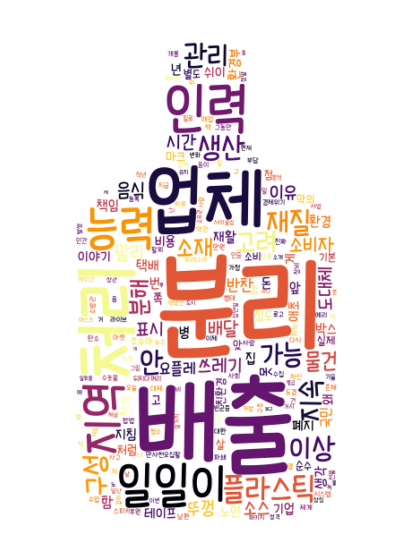

In [37]:
from konlpy.tag import Okt
from konlpy.utils import pprint
import nltk    
from wordcloud import WordCloud,STOPWORDS           
import matplotlib.pyplot as plt 
import numpy as np
from PIL import Image

t = Okt()
tokens_ko = t.nouns(koreanlist) # 명사 토큰만 추출

# 추출한 토큰으로 명사 객체 생성
ko_ = nltk.Text(tokens_ko)       

# 빈도수로 추출 후 딕셔너리로 저장
freq_word = ko_.vocab()
freq_dic = dict(freq_word)


# generate_from_frequencies에서는 stopwords 지원하지 않음.
# 직접 빼줘야 한다.

popwordlist = ['재활용', '분리수거', '코카콜라', '쉿', '두부', '기프티콘',
              '리트윗', '용기', '원더', '새', '원', '즉석밥', '것',
              '선별', '캠페인', '업사이클', '콬따', '나', '거기', '명', '글', '알', '수' ,'라벨', '참여',
              '때', '햇반', '따라서', '여러분', '등', '뭐', '뭐임맥', '등등', '여러가지',
              '말', '뒤', '이', '내', '더', '그냥', '모두', '통']

for popword in popwordlist :
    freq_dic.pop(popword)

# ---사용 불가----
# stopwords = set()                               
# stopwords.add('재활용')

freq_dic_sorted = sorted(freq_dic.items(),
                        reverse=True,
                        key=lambda item: item[1])

myfontpath = "data/THEdog.ttf" 

bottle_mask = np.array(Image.open("bottle.png"))

wordcloud = WordCloud(font_path = myfontpath,
                      background_color = 'white',
                      mask = bottle_mask,
                      width = 700, height = 500,
                      colormap='inferno').generate_from_frequencies(freq_dic)

wordcloud.to_file('recycle_wordcloud.png')

fig = plt.figure(figsize=(10,10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()